# 우선 필요한 라이브러리를 불러오겠습니다

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 편의를 위해 4개의 세트(e.g., 핑클빵)를 먼저 살펴보도록 하겠습니다.

In [166]:
# 핑클빵에는 4개의 스티커가 있습니다.
finkl = ['이효리','이진','성유리','옥주현']

# 내가 수집한 스티커의 모음집을 k 라고 하겠습니다.
k = []
num = 0

# 이 코드는 내가 핑클빵의 4개의 스티커를 모두 수집할때까지 계속 빵을 구매하는 것을 구현했습니다.
while True:
    num += 1
    k.append(np.random.choice(finkl))
    print(k)
    k.sort()
    if set(k) == set(finkl):
        break
print('총 {}개의 빵을 구입하여 스티커 4개를 모두 모았습니다.'.format(num))

['이진']
['이진', '옥주현']
['옥주현', '이진', '옥주현']
['옥주현', '옥주현', '이진', '이효리']
['옥주현', '옥주현', '이진', '이효리', '이진']
['옥주현', '옥주현', '이진', '이진', '이효리', '이진']
['옥주현', '옥주현', '이진', '이진', '이진', '이효리', '이진']
['옥주현', '옥주현', '이진', '이진', '이진', '이진', '이효리', '이효리']
['옥주현', '옥주현', '이진', '이진', '이진', '이진', '이효리', '이효리', '이진']
['옥주현', '옥주현', '이진', '이진', '이진', '이진', '이진', '이효리', '이효리', '이진']
['옥주현', '옥주현', '이진', '이진', '이진', '이진', '이진', '이진', '이효리', '이효리', '성유리']
총 11개의 빵을 구입하여 스티커 4개를 모두 모았습니다.


# 정말 운이 좋을때는 4번만에 모든 스티커를 모을 때도 있습니다. 반면 운이 아주 나쁘면 10번이 넘게 빵을 구매했을때도 스티커를 다 모으지 못할 때도 있지요.
# 그렇다면 우리가 대충 빵을 몇개정도를 사야 스티커를 다 모을 수 있는지 평균적으로 알아볼 수 있을까요?

In [97]:
# 이 코드는 세가지 부분으로 이루어져 있습니다.
# 첫번째는 위에서 본 몇번 빵을 사야 4개의 스티커를 모을 수 있는지를 계산하는 코드를 100번을 반복해서 실행하게 됩니다.
# 예를들자면 5번, 7번, 8번, 14번, 9번... 등등의 결과값들이 100번 생성이 되게 됩니다.
# 두번째는 이 생성된 100개의 숫자들의 평균을 냅니다.
# 마지막으로 세번째는 위 두개의 절차를 다시 1000번 반복하여, 두번째 절차때 생성된 평균값들을 m 이라는 리스트에 저장합니다.


m = []

for j in range(1000):
    l = []
    for i in range(100):
        k = []
        num = 0
        while True:
            num += 1
            k.append(np.random.randint(1,5))
            k.sort()
            if set(k) == set(list(range(1,5))):
                break
        l.append(num)    
    m.append(np.mean(l))

# 자, 이제 모여진 평균들의 평균을 계산해보면, 대충 우리가 원하는 빵을 몇개를 사야 스티커를 모을 수 있는지에 대한 대답이 나올 것 같습니다.

In [135]:
np.mean(m)

8.33369

# 평균적으로 8.33개의 빵을 사면 스티커 4개를 모을 수 있군요. 

# 여기서 보너스로 중요한 통계학적 개념을 한개 설명해 드리겠습니다.
# 다음은, 스티커 4개를 모을때 까지 빵을 계속 사는것을 100번 반복했을때의 빵 구매 개수의 분포도입니다 (즉, 위에 1,2번 절차).

(array([0.16578947, 0.15789474, 0.11052632, 0.14210526, 0.05526316,
        0.04736842, 0.02368421, 0.01578947, 0.03157895, 0.00789474,
        0.00789474, 0.00789474, 0.        , 0.00789474, 0.00789474]),
 array([ 4.        ,  5.26666667,  6.53333333,  7.8       ,  9.06666667,
        10.33333333, 11.6       , 12.86666667, 14.13333333, 15.4       ,
        16.66666667, 17.93333333, 19.2       , 20.46666667, 21.73333333,
        23.        ]),
 <a list of 15 Patch objects>)

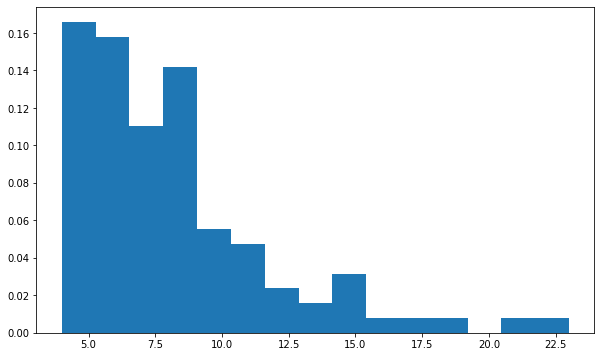

In [170]:
l = []
for i in range(100):
    k = []
    num = 0
    while True:
        num += 1
        k.append(np.random.randint(1,5))
        k.sort()
        if set(k) == set(list(range(1,5))):
            break
    l.append(num)
plt.figure(figsize = (10,6))
plt.hist(l, bins = 15, density = True)

# 보시다시피 분포가 왼쪽으로 모여있습니다.
# 그렇다면 이 분포의 평균을 1,000번 모아두었던 m의 분포는 어떤 모양일까요?
# 직관적으로 생각했을때 여러분의 생각은 어떻습니까?

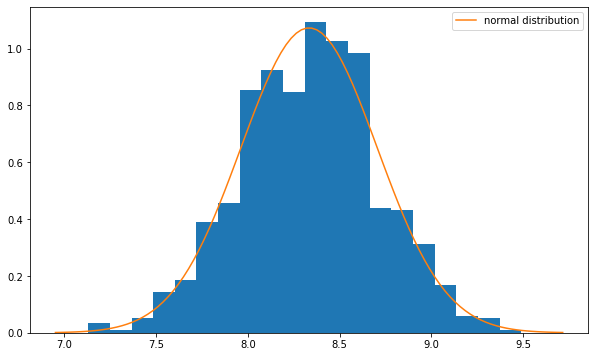

In [119]:
plt.figure(figsize = (10,6))
plt.hist(m, bins = 20, density = True)
noi = stats.norm(loc = np.mean(m), scale = np.std(m))
xnoi = np.linspace(noi.ppf(0.0001), noi.ppf(0.9999), 100)
ynoi = noi.pdf(xnoi)
plt.plot(xnoi,ynoi, label = 'normal distribution')
plt.legend()

# 보시다시피 이 히스토그램을 보면 평균의 모임인 m의 분포는 확실히 정규분포와 비슷하게 생겼습니다.
# 그럼 진짜 정규분포인지 한번 QQ플롯을 그려 확인해보겠습니다.

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

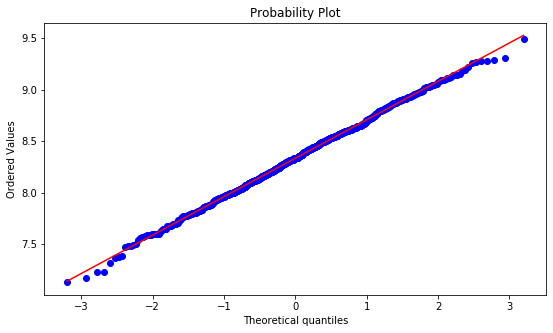

In [121]:
plt.figure(figsize = (9,5))
stats.probplot(m, dist=stats.norm, plot = plt)

# ㄹㅇ 정규분포가 맞는거같네요
# 이것은 중심극한정리라는것 때문에 발생한 일입니다.
# 어떤 이상한 확률분포도 그 평균의 샘플을 많이 뽑아서 평균의 분포도를 그리면 정규분포와 가까워집니다.

# 다시 핑클빵으로 돌아와서, 사실 이렇게 컴퓨터로 직접 샘플을 뽑지 않고, 간단한 계산식으로 평균을 구하는 방법도 존재합니다.

# 확률분포의 기대값의 성질을 이용한 방법인데, 간단히 설명을 드리자면 다음과 같습니다.

# 여러분이 핑클빵을 아직 한개도 안샀다고 생각해 봅시다.

# 이때, 핑클빵을 한개 샀을때 내가 한개도 가지지 않은 스티커를 갖게될 확률은 100% 입니다. 너무 쉽죠? 이건 당연한 얘기입니다.

# 그럼 만약 내가 빵을 한개를 사서 이효리 스티커를 한개 갖고 있는 상황이라고 해 봅시다.

# 다음에는 확률적으로 빵을 몇개를 사야 이효리가 아닌 다른 스티커가 나오게 될까요?

# 빵을 한개 더 샀을때 이효리가 아닌 다른 3명의 멤버가 나올 확률은 3/4 입니다.

# 바꿔말하면 3/4의 확률로 빵을 한개 더샀을때 새로운 스티커를 모을 수 있습니다.

# 하지만 그 말은 1/4의 확률로 빵을 한개 더 샀을때 또 이효리 스티커가 나올 수도 있다는 말입니다.

# 만약 빵을 한개 더 사서 이효리 스티커가 나왔을때, 한개 또 사서 다른 스티커가 나올 확률은 그럼 어떻게 계산할까요?

# (1/4) 곱하게 (3/4) 일겁니다.

# 만약 연속으로 이효리가 2번 나오고 한번 더 사서 다른 스티커가 나올 확률은 똑같은 방법으로 (1/4) 곱하기 (1/4) 곱하기 (3/4) 입니다.

# 즉 이것을 표로 만들어본다면

In [159]:
import pandas as pd
pd.DataFrame(pd.Series({
    '1번째': '3/4',
    '2번째': '1/4 곱하기 3/4',
    '3번째': '1/4 곱하기 1/4 곱하기 3/4'
}, name = '첫번째 빵에서 이효리가 나왔을때 두번째 빵에서 다른 스티커가 나올 확률'))

,첫번째 빵에서 이효리가 나왔을때 두번째 빵에서 다른 스티커가 나올 확률
1번째,3/4
2번째,1/4 곱하기 3/4
3번째,1/4 곱하기 1/4 곱하기 3/4


In [148]:
total = 0
for i in range(4):
    for j in range(100):
        total += (j+1)*((i)/4)**j * ((4 - i)/4)
print(total)

8.33333333329999


In [174]:
total = 0
n = 151
for i in range(n):
    for j in range(100000):
        total += (j+1)*((i)/n)**j * ((n - i)/n)
print(total)

845.2682688851988


In [177]:
total = 0
for i in range(1,152):
    total += 1/i
total *= 151
total

845.268268885226